In [18]:
import pandas as pd
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [19]:
# Load your data into a DataFrame
df = pd.read_csv("../results/tpot_results_df.csv")

# Remove duplicates ignoring the "id" field
subset = list(df.columns)
subset.remove("id")
df_no_dup = df.drop_duplicates(subset=subset)

In [20]:
list(df_no_dup.columns)

['id',
 'component',
 'reshape_cube',
 'number of features',
 'CV Accuracy (Training)',
 'CV Std (Training)',
 'Accuracy (Test)',
 'F1 Score (Test)',
 'Precision Score (Test)']

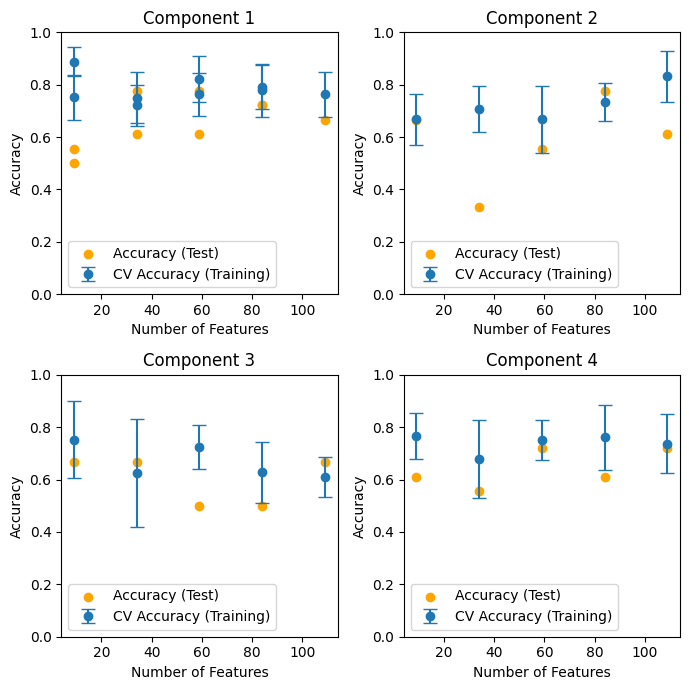

In [32]:
# filter the dataframe
df = df_no_dup[df_no_dup["reshape_cube"] == 5]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

for i, ax in enumerate(axes.flat):
    # Filter data for the current component
    component_data = df[df["component"] == i+1]
    
    # Plot the "CV Accuracy (Training)" and "Accuracy (Test)" with error bars
    ax.errorbar(component_data["number of features"], 
                component_data["CV Accuracy (Training)"], 
                label="CV Accuracy (Training)", 
                yerr=component_data["CV Std (Training)"], 
                fmt="o", 
                capsize=5)
    ax.scatter(component_data["number of features"], 
               component_data["Accuracy (Test)"], 
               label="Accuracy (Test)",
               color="orange")
    
    # Set labels and title
    ax.set_xlabel("Number of Features")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Component {i+1}")
    
    # Add legend
    ax.legend()

    # set y limits
    ax.set_ylim(0, 1)

# Adjust subplot layout and display the plots
plt.tight_layout()
plt.show()


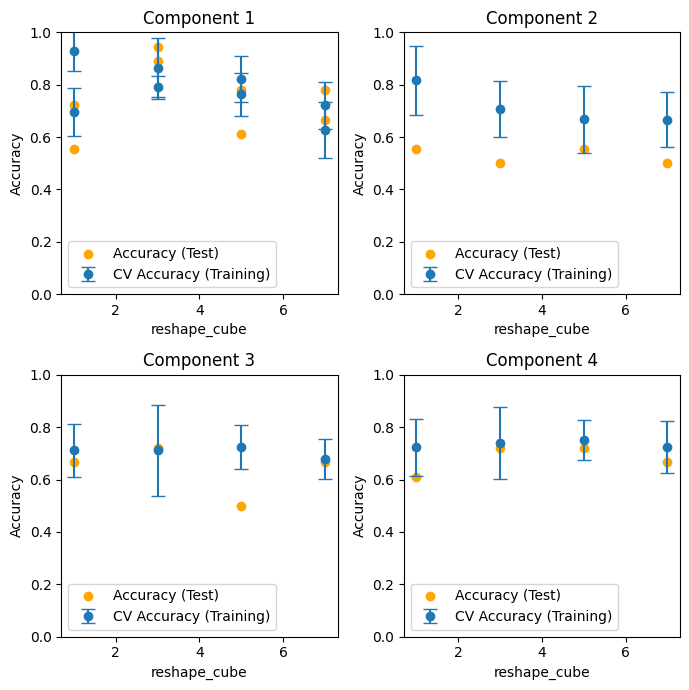

In [31]:
# filter the dataframe
df = df_no_dup[df_no_dup["number of features"] == 59]

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(7, 7))

for i, ax in enumerate(axes.flat):
    # Filter data for the current component
    component_data = df[df["component"] == i+1]
    
    # Plot the "CV Accuracy (Training)" and "Accuracy (Test)" with error bars
    ax.errorbar(component_data["reshape_cube"], 
                component_data["CV Accuracy (Training)"], 
                label="CV Accuracy (Training)", 
                yerr=component_data["CV Std (Training)"], 
                fmt="o", 
                capsize=5)
    ax.scatter(component_data["reshape_cube"], 
               component_data["Accuracy (Test)"], 
               label="Accuracy (Test)",
               color="orange")
    
    # Set labels and title
    ax.set_xlabel("reshape_cube")
    ax.set_ylabel("Accuracy")
    ax.set_title(f"Component {i+1}")
    
    # Add legend
    ax.legend()

    # set y limits
    ax.set_ylim(0, 1)

# Adjust subplot layout and display the plots
plt.tight_layout()
plt.show()


<Axes: xlabel='number of features', ylabel='CV Accuracy (Training)'>

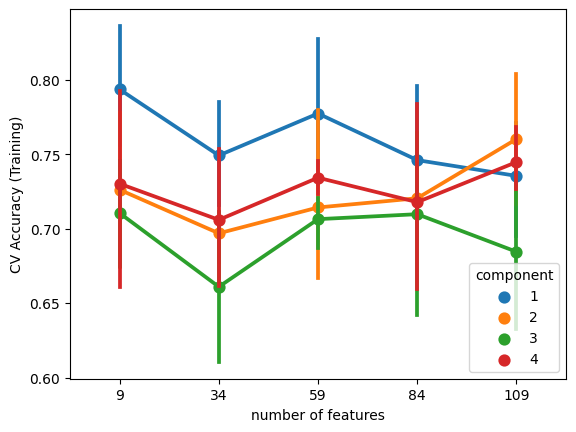

In [5]:
sns.pointplot(data=df, x="number of features", y="CV Accuracy (Training)", hue="component")

In [63]:
# function to plot in plotly
def plot_results(df, x_axis, y_axis):
    
    # Create a Plotly bar chart
    fig = go.Figure()

    # Add the accuracy traces
    fig.add_trace(go.Scatter(df,
                             x=x_axis,
                             y=y_axis,
                             mode='markers',
                             name=y_axis,
                             color="reshape_cube"
                             ))

    # Show the plot
    fig.show()


In [64]:
# filter the dataframe
df = df_no_dup[df_no_dup["component"] == 1]

In [65]:
# plot the results
plot_results(df, "number of features", "CV Accuracy (Training)")

ValueError: The first argument to the plotly.graph_objs.Scatter
constructor must be a dict or
an instance of :class:`plotly.graph_objs.Scatter`